In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Paths - adjust if your notebook is in a different location
DATA_DIR = "dataset/CodeWorkout"

In [5]:

main_table = pd.read_csv(f"{DATA_DIR}/MainTable.csv")
print(f"Main table: {len(main_table):,} rows")

codestate_table = pd.read_csv(f"{DATA_DIR}/LinkTables/CodeStates.csv")
print(f"CodeState table: {len(codestate_table):,} rows")

subject_table = pd.read_csv(f"{DATA_DIR}/LinkTables/Subject.csv")
print(f"Subject table: {len(subject_table):,} rows")

Main table: 201,570 rows
CodeState table: 69,627 rows
Subject table: 381 rows


In [6]:

df = main_table.merge(codestate_table, on="CodeStateID")
df = df.merge(subject_table, on="SubjectID")
print(f"Joined dataset: {len(df):,} rows")
print(f"Columns: {df.columns.tolist()}")

Joined dataset: 191,584 rows
Columns: ['Order', 'SubjectID', 'ToolInstances', 'ServerTimestamp', 'ServerTimezone', 'CourseID', 'CourseSectionID', 'TermID', 'AssignmentID', 'ProblemID', 'Attempt', 'CodeStateID', 'IsEventOrderingConsistent', 'EventType', 'Score', 'Compile.Result', 'CompileMessageType', 'CompileMessageData', 'EventID', 'ParentEventID', 'SourceLocation', 'Code', 'X-Grade']


In [7]:
df.head()

,Order,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,CourseSectionID,TermID,AssignmentID,ProblemID,...,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,ParentEventID,SourceLocation,Code,X-Grade
0,0,14502,Java 8; CodeWorkout,2019-03-20T19:34:25,0,CS 1114,410.0,spring-2019,492.0,32,...,Run.Program,1.0,NaN,NaN,NaN,32-84779,NaN,NaN,"public String plusOut(String str, String word)...",0.88
1,1,14502,Java 8; CodeWorkout,2019-03-20T19:34:25,0,CS 1114,410.0,spring-2019,492.0,32,...,Compile,NaN,Success,NaN,NaN,32-84780,32-84779,NaN,"public String plusOut(String str, String word)...",0.88
2,4,13499,Java 8; CodeWorkout,2019-03-20T21:13:09,0,CS 1114,410.0,spring-2019,492.0,32,...,Run.Program,0.0,NaN,NaN,NaN,32-84783,NaN,NaN,"public String plusOut(String str, String word)...",0.92
3,5,13499,Java 8; CodeWorkout,2019-03-20T21:13:09,0,CS 1114,410.0,spring-2019,492.0,32,...,Compile,NaN,Error,NaN,NaN,32-84784,32-84783,NaN,"public String plusOut(String str, String word)...",0.92
4,6,13499,Java 8; CodeWorkout,2019-03-20T21:13:09,0,CS 1114,410.0,spring-2019,492.0,32,...,Compile.Error,NaN,NaN,SyntaxError,line 3: error: ';' expected,32-84785,32-84784,Text:3,"public String plusOut(String str, String word)...",0.92


In [8]:
print("Submissions per Problem:")
submissions_per_problem = df.groupby('ProblemID').size().sort_values(ascending=False)
print(submissions_per_problem.describe())
print(f"\nUnique problems: {df['ProblemID'].nunique()}")

Submissions per Problem:
count       50.00000
mean      3831.68000
std       2203.66066
min       1277.00000
25%       2467.50000
50%       3201.50000
75%       4095.00000
max      13388.00000
dtype: float64

Unique problems: 50


In [9]:
df['code_length'] = df['Code'].str.len()
df['estimated_tokens'] = df['code_length'] / 4  # rough estimate: 4 chars ≈ 1 token

print("Code length statistics:")
print(df['code_length'].describe())

print("\nEstimated tokens per submission:")
print(df['estimated_tokens'].describe())

Code length statistics:
count    191584.000000
mean        346.031052
std         169.383148
min          36.000000
25%         232.000000
50%         311.000000
75%         428.000000
max        2606.000000
Name: code_length, dtype: float64

Estimated tokens per submission:
count    191584.000000
mean         86.507763
std          42.345787
min           9.000000
25%          58.000000
50%          77.750000
75%         107.000000
max         651.500000
Name: estimated_tokens, dtype: float64


In [10]:
tokens_per_problem = df.groupby('ProblemID')['estimated_tokens'].sum()
print("Estimated total tokens per problem:")
print(tokens_per_problem.sort_index())

Estimated total tokens per problem:
ProblemID
1        94498.75
3       233605.00
5       222654.00
12      121131.25
13     1433729.50
17      112680.75
20      163734.50
21      108127.75
22      250964.75
24      444037.75
25      484812.25
28      238268.25
31      156493.50
32      684948.50
33      519293.75
34      478283.50
36      288322.25
37      356586.25
38      592020.25
39      333557.75
40      711218.75
41       62340.00
43      418748.25
44       93970.50
45      301765.75
46      246725.75
48      259983.50
49      228475.25
51      225623.00
56      237132.00
57       58235.50
64      349421.00
67      290354.00
70      369635.50
71      201724.50
100     275718.50
101     631779.00
102     616828.00
104     328096.25
106     267079.50
107     345635.50
108     477330.00
112     146479.50
118     151955.25
128     329013.25
232     844123.50
233     162500.00
234     234333.50
235     172979.50
236     216548.50
Name: estimated_tokens, dtype: float64


In [11]:
attempts_per_student_problem = df.groupby(['SubjectID', 'ProblemID']).size()
print("Attempts per student per problem:")
print(attempts_per_student_problem.describe())

Attempts per student per problem:
count    15375.000000
mean        12.460748
std         20.796445
min          2.000000
25%          2.000000
50%          5.000000
75%         14.000000
max        556.000000
dtype: float64



COMPILE ERROR ANALYSIS
Total compile error events: 58446

--- Error Types ---
CompileMessageType
SyntaxError    58446
Name: count, dtype: int64

--- Common Error Patterns ---
                 Error Type  Count
                      Other  24520
          Missing semicolon  13540
Illegal start of expression   7469
  Undefined variable/symbol   6549
             Missing return   3743
              Type mismatch   2625


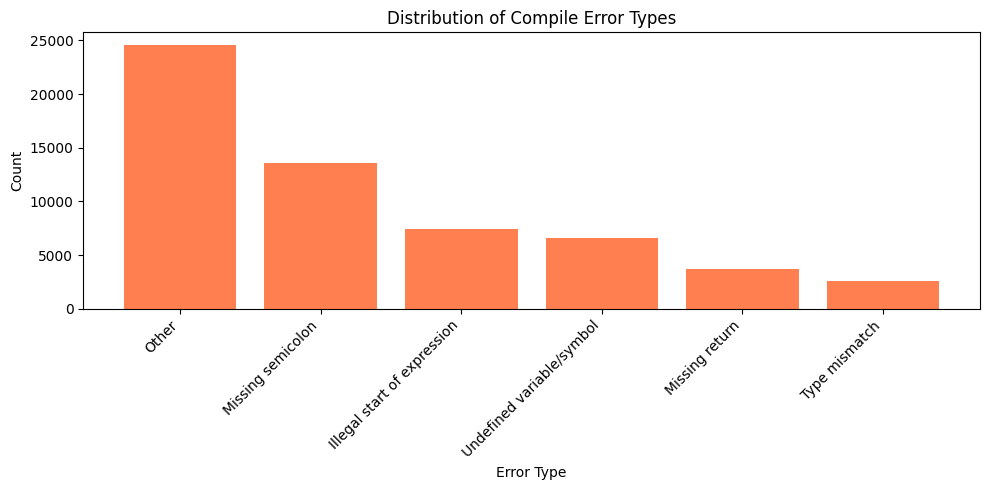

In [ ]:

print("COMPILE ERROR ANALYSIS")


# Filter to Compile.Error events
compile_errors = df[df['EventType'] == 'Compile.Error']
print(f"Total compile error events: {len(compile_errors)}")

# Error types
print("\n--- Error Types ---")
error_type_counts = compile_errors['CompileMessageType'].value_counts()
print(error_type_counts)

# Parse specific error patterns from CompileMessageData
print("\n--- Common Error Patterns ---")
error_messages = compile_errors['CompileMessageData'].dropna()

# Extract error patterns
error_patterns = {}
for msg in error_messages:
    if "';' expected" in msg:
        error_patterns['Missing semicolon'] = error_patterns.get('Missing semicolon', 0) + 1
    elif 'cannot find symbol' in msg:
        error_patterns['Undefined variable/symbol'] = error_patterns.get('Undefined variable/symbol', 0) + 1
    elif 'missing return statement' in msg:
        error_patterns['Missing return'] = error_patterns.get('Missing return', 0) + 1
    elif 'incompatible types' in msg:
        error_patterns['Type mismatch'] = error_patterns.get('Type mismatch', 0) + 1
    elif 'illegal start' in msg:
        error_patterns['Illegal start of expression'] = error_patterns.get('Illegal start of expression', 0) + 1
    else:
        error_patterns['Other'] = error_patterns.get('Other', 0) + 1

error_df = pd.DataFrame(list(error_patterns.items()), columns=['Error Type', 'Count'])
error_df = error_df.sort_values('Count', ascending=False)
print(error_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(error_df['Error Type'], error_df['Count'], color='coral')
plt.title('Distribution of Compile Error Types')
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
print("BASIC DATASET STATISTICS")


unique_students = df['SubjectID'].nunique()
unique_problems = df['ProblemID'].nunique()
unique_code_submissions = df['CodeStateID'].nunique()

# Run.Program events represent actual submission attempts
run_events = df[df['EventType'] == 'Run.Program']
total_submission_attempts = len(run_events)

print(f"Unique Students: {unique_students}")
print(f"Unique Problems: {unique_problems}")
print(f"Unique Code Snapshots: {unique_code_submissions}")
print(f"Total Submission Attempts: {total_submission_attempts}")

BASIC DATASET STATISTICS
Unique Students: 372
Unique Problems: 50
Unique Code Snapshots: 66438
Total Submission Attempts: 66569


ATTEMPTS PER STUDENT-PROBLEM
Attempts needed per student-problem:
count    15375.000000
mean         4.819317
std          6.836139
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        156.000000
Name: MaxAttempts, dtype: float64

--- Distribution of Max Attempts ---
MaxAttempts
1     5130
2     2617
3     1645
4     1177
5      863
6      692
7      539
8      408
9      344
10     299
Name: count, dtype: int64


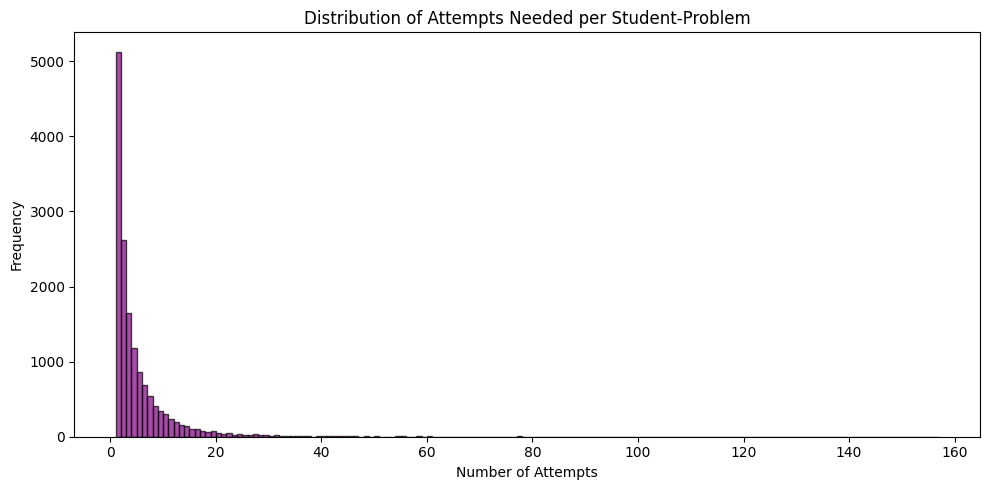

In [18]:
print("ATTEMPTS PER STUDENT-PROBLEM")


# Group by student and problem, count attempts
attempts_summary = run_events.groupby(['SubjectID', 'ProblemID'])['Attempt'].max().reset_index()
attempts_summary.columns = ['SubjectID', 'ProblemID', 'MaxAttempts']

print("Attempts needed per student-problem:")
print(attempts_summary['MaxAttempts'].describe())

# Distribution of max attempts
print("\n--- Distribution of Max Attempts ---")
attempt_dist = attempts_summary['MaxAttempts'].value_counts().sort_index()
print(attempt_dist.head(10))

# Visualize
plt.figure(figsize=(10, 5))
plt.hist(attempts_summary['MaxAttempts'], bins=range(1, attempts_summary['MaxAttempts'].max()+2), 
         color='purple', edgecolor='black', alpha=0.7)
plt.title('Distribution of Attempts Needed per Student-Problem')
plt.xlabel('Number of Attempts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Correlation between grade and error count:
Pearson correlation: 0.1725

--- Average Errors by Grade Bin ---
                          mean  count
GradeBin                             
Low (0-0.4)         110.941176     34
Mid-Low (0.4-0.6)   164.067416     89
Mid-High (0.6-0.8)  186.806723    119
High (0.8-1.0)      153.442308    104


/tmp/ipykernel_6945/1563150752.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  errors_by_grade = grade_error_df.groupby('GradeBin')['ErrorCount'].agg(['mean', 'count'])


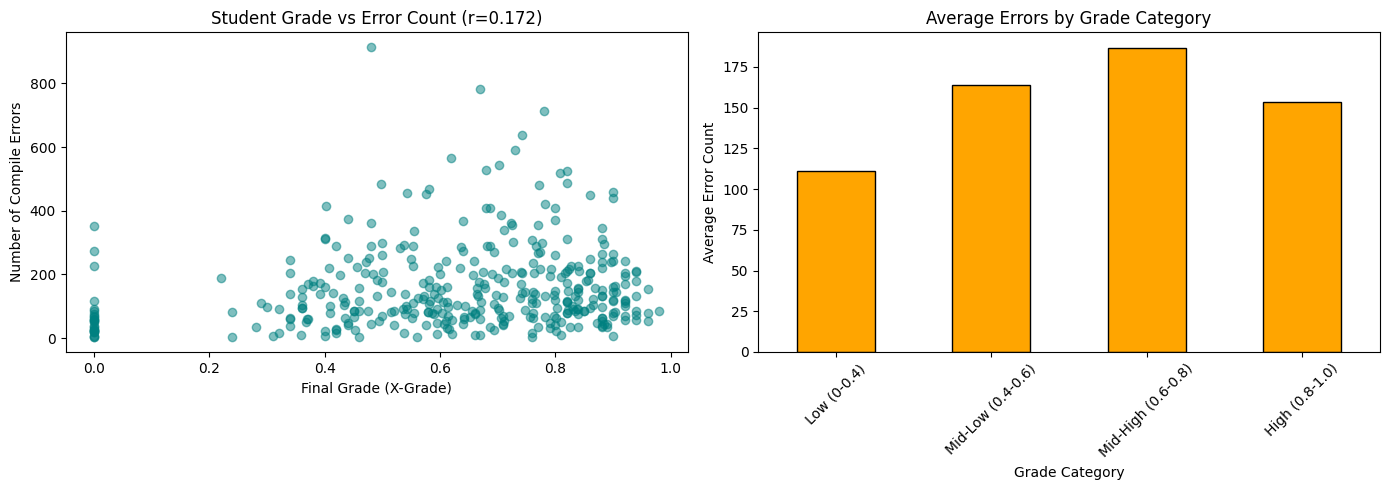

In [20]:
# Count errors per student
student_errors = compile_errors.groupby('SubjectID').size().reset_index(name='ErrorCount')

# Get unique student grades
student_grades = df[['SubjectID', 'X-Grade']].drop_duplicates()

# Merge
grade_error_df = student_grades.merge(student_errors, on='SubjectID', how='left')
grade_error_df['ErrorCount'] = grade_error_df['ErrorCount'].fillna(0)

print("Correlation between grade and error count:")
correlation = grade_error_df['X-Grade'].corr(grade_error_df['ErrorCount'])
print(f"Pearson correlation: {correlation:.4f}")

# Bin students by grade
grade_error_df['GradeBin'] = pd.cut(grade_error_df['X-Grade'], 
                                     bins=[0, 0.4, 0.6, 0.8, 1.0], 
                                     labels=['Low (0-0.4)', 'Mid-Low (0.4-0.6)', 
                                            'Mid-High (0.6-0.8)', 'High (0.8-1.0)'])

print("\n--- Average Errors by Grade Bin ---")
errors_by_grade = grade_error_df.groupby('GradeBin')['ErrorCount'].agg(['mean', 'count'])
print(errors_by_grade)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(grade_error_df['X-Grade'], grade_error_df['ErrorCount'], alpha=0.5, color='teal')
axes[0].set_title(f'Student Grade vs Error Count (r={correlation:.3f})')
axes[0].set_xlabel('Final Grade (X-Grade)')
axes[0].set_ylabel('Number of Compile Errors')

# Bar plot by grade bin
errors_by_grade['mean'].plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title('Average Errors by Grade Category')
axes[1].set_xlabel('Grade Category')
axes[1].set_ylabel('Average Error Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()